# classifications

with machine learning it never says for certain that the prediction is correct. It only says that this image 
has the highest probability of being correct. 

In [1]:
import torch 
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

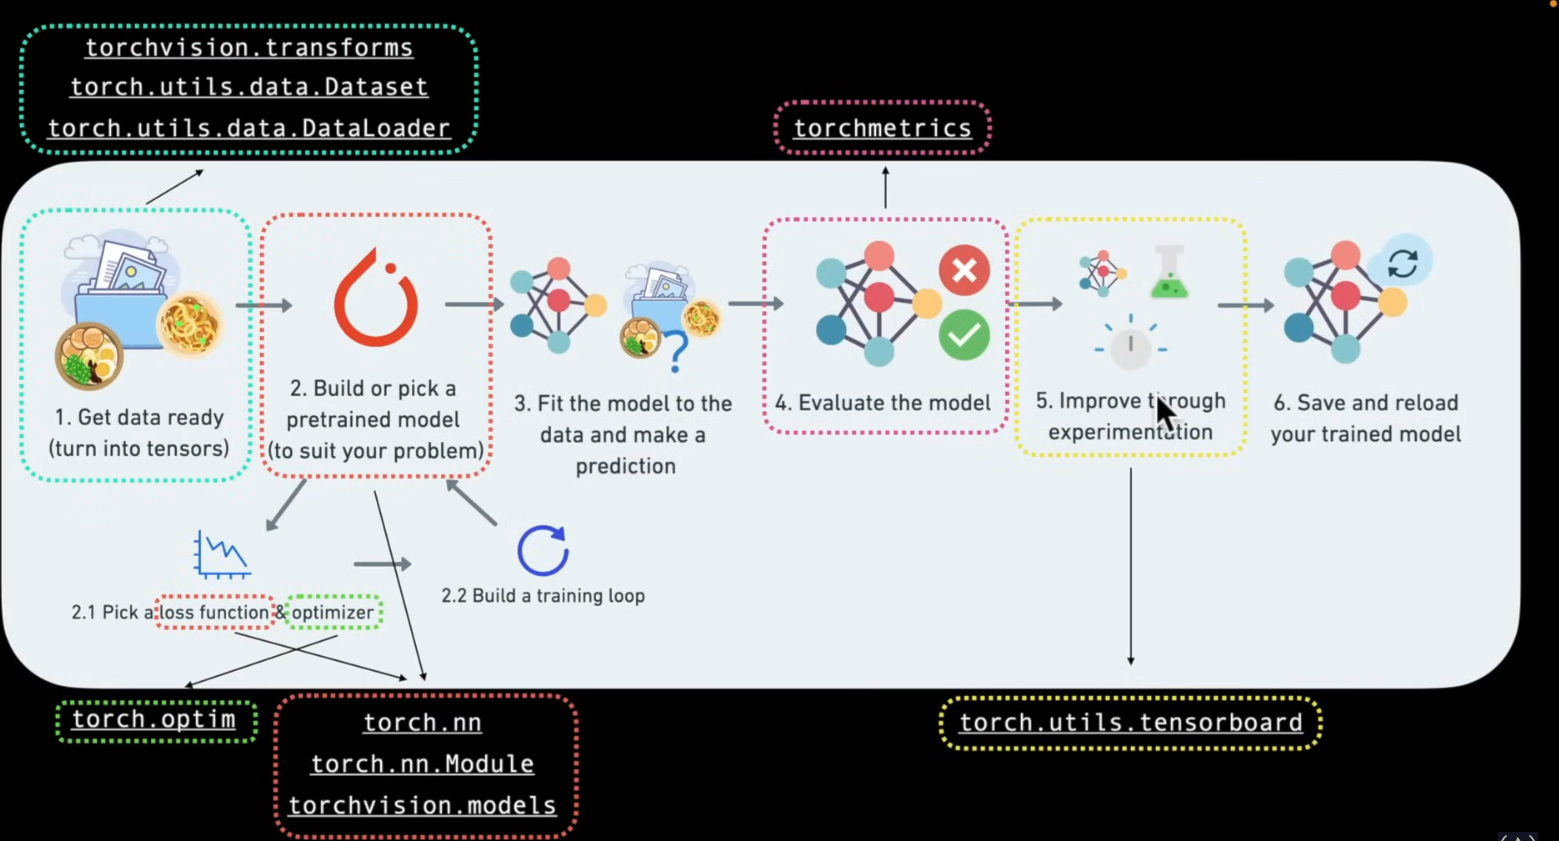

In [2]:
# importing all pictures
import import_ipynb
import Images as img
img.ML_process()

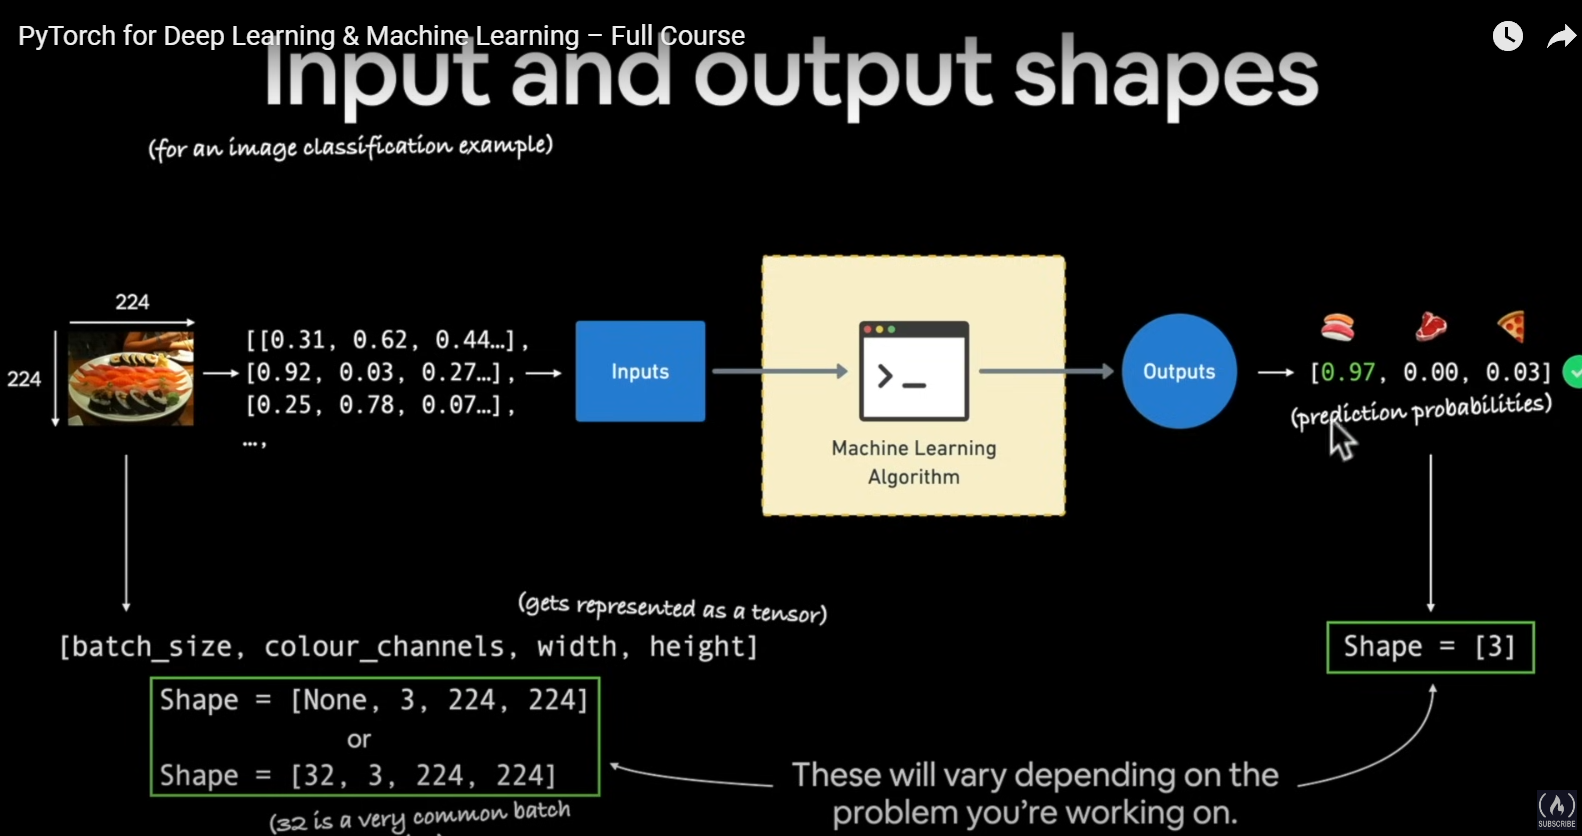

In [3]:
img.classification()

In the image above
batch_size is equal to none or 32. 
* This is saying how many images the computer should look at, at one time
* **It is noted that batch size is most efficient while using a number devisable by 8**

The number 3 is because we are using 3 layers of classification. 
Looking at the output we can see that we are trying to determine 
weather the image that was provided is sushi meat or a pizza.

The last 2 layers are the size/dimensions of the image provided width by height.  


# Make classification data and get it ready

* The process is the same ML_process that it has always been.
* preparing data step 1

In [4]:
# making 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,# 1
                    noise=0.03, # this is used to create some randomness inside of the code
                    random_state=42) ## this is the same as setting a random seed so that we can have re-producible code. 


In [5]:
len(X), len(y)

(1000, 1000)

In [6]:
print(f"fist 5 of x:\n {X[:5]}\n first 5 of y:\n {y[:5]}")

fist 5 of x:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
 first 5 of y:
 [1 1 1 1 0]


In [7]:
# making a DataFrame 
import pandas as pd
circles = pd.DataFrame({"X1:": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1:,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


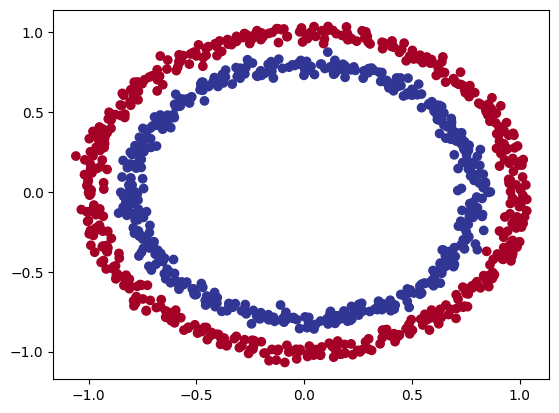

In [8]:
# looking at it on a graph
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)


# Turning data into tensors.
* Also step 1 in ML process

In [9]:
# going back to the fundamentals one of the most common errors is that the shapes don't match. 
# So make sure that the input and output match 
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# view the first example
X_sample = X[0]
y_sample = y[0]

print(f"values for one sample of x: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of x: {X_sample.shape} and the same for y: {y_sample.shape}")

values for one sample of x: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of x: (2,) and the same for y: ()


In [11]:
# Turning data into tensors
# changing into tensor default datatype
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5] 

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

# Spiting the data Training and test sets

In [12]:
# Splitting the data randomly
from sklearn.model_selection import train_test_split

# must be written in this order if using this method to split data. 
X_train, X_test, y_train, y_test = train_test_split(X, # the testing data
                                                    y, # labels
                                                    test_size=0.2, # how big the test split will be (.2 = 20%)
                                                    random_state=42) # set the random seed same as torch.manuel_seed(42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Building a model

Model to classify our blue and red dots

To do 
1. setup device agonistic code so our code will run on an GPU (completed at the top already)
2. Construct a model(by subclassing nn.model)
3. Define a loss function and optimizer
4. Create a training and test loop

In [13]:
# device agonistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Constructing a model
1. subclass nn.model (almost all pytorch models use this)
2. create 2 nn.Linear() layers that are able to handle the shapes of our data
3. defines a forward() method that outlines the forward pass (or forward compotation) of hte model
4. Insatiate an instance of our model class and send it to the target device

# Model
Note that if you have more than one self.layer the in_features of the layer must be the same as the 
out_features of the previous layer. 

Out features
* This also act like a hidden layer
* the more out_features that a model has the more of a chance the computer has to find patterns in the data,
but there is a upper limit to this (dimensioning return). 


In [14]:
# 1. constructing a model 
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. create 2 nn.Linear layers that can handle the shape of the data
        # We take in 2 in_features because X_train shape is 2 columns
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and out put 5
        
        # THE IN FEATURES OF THIS LAYER MUST MATCH THE OUT FEATURES OF THE PREVIOUS LAYER
        self.layer_2 = nn.Linear(in_features=5, out_features=1) 

    # 3. defines a forward() method that outlines the forward pass
    def forward(self, x):
        # Codes backwards but works from the inside out. 
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    
# Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
# checking that the model is on the gpu
next(model_0.parameters()).device

device(type='cuda', index=0)

* For a more complex model it is better to use subclassing. (above)
* For a simpler model it's better and easier to use sequential 

In [16]:
# replicating the model above using nn.Sequential()
model_0 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
                        nn.Linear(in_features=5, out_features=1)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4804, -0.2059],
                      [-0.0300, -0.3063],
                      [ 0.1552,  0.3052],
                      [-0.1561, -0.6139],
                      [ 0.5365, -0.4654]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5807, -0.2500, -0.0980, -0.6458,  0.5508], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0250, -0.2347, -0.1009, -0.2911, -0.1613]], device='cuda:0')),
             ('1.bias', tensor([-0.2884], device='cuda:0'))])

In [18]:
# Make predictions 
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test sample: {len(X_test)}, Shape: {X_test.shape}")
print(f"\n First 10 predictions: \n{untrained_preds[:10]}")
print(f"\n Firs 10 labels: \n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test sample: 200, Shape: torch.Size([200, 2])

 First 10 predictions: 
tensor([[ 1.1474e-01],
        [ 1.7099e-01],
        [-1.5398e-01],
        [ 1.9138e-01],
        [-3.4646e-01],
        [-3.1063e-01],
        [ 3.1161e-04],
        [-1.1297e-01],
        [-1.4545e-01],
        [ 1.7263e-01]], device='cuda:0')

 Firs 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


# Setting up the loss function
picking the loss function 
* For regression using MAE or MSE will most likely be the way to go
* For classification using binary cross entropy or categorical cross entropy will be the way to go

Remember loss function measures how wrong th module is

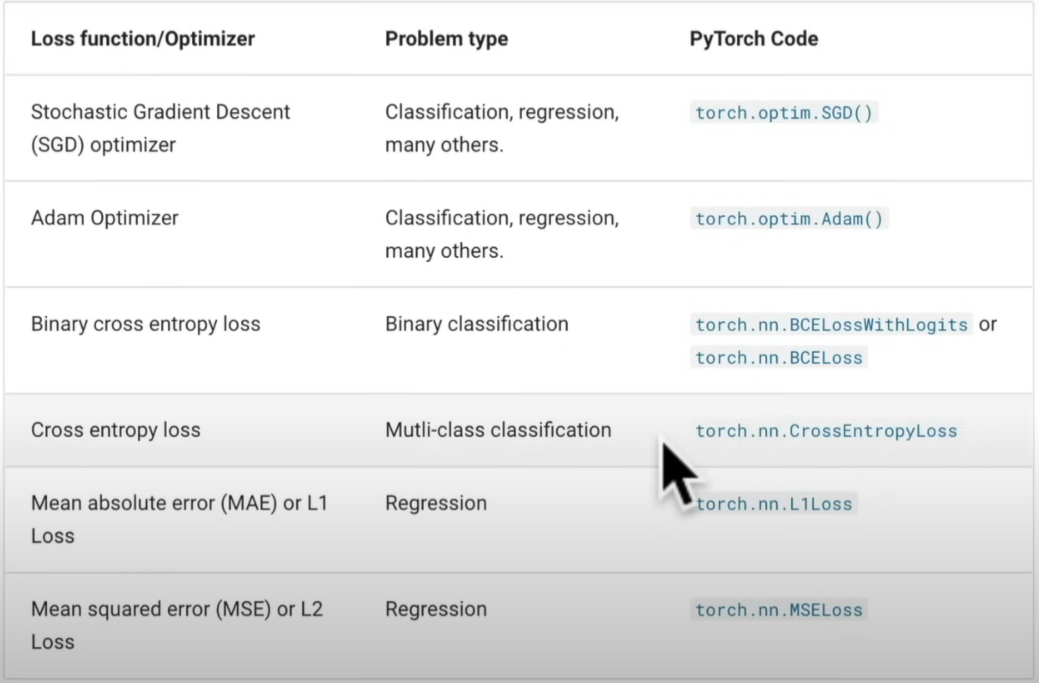

In [19]:
# some common loss functions are
img.loss_functions()

For this model we are going to use binary cross entropy (BCE)
* `torch.nn.BCEWithLogitsLoss()`

In [20]:
# setting up the loss function
# note that this is the same as having a sigmoid layer followed by a BCELoss layer
# this way also provides more stability
loss_fn = nn.BCEWithLogitsLoss()

# optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1) # this is optimizing the model_0.state_dict()

# Accuracy

In [21]:
# calculating accuracy out of 100 examples
def accuracy_fn(y_true, y_pred):
    # how many of y_pred are equal to y_true
    correct = torch.eq(y_true, y_pred).sum().item() # item() gives back a single value
    acc = (correct/len(y_pred))* 100
    return acc

# Training the model

First build the training loop

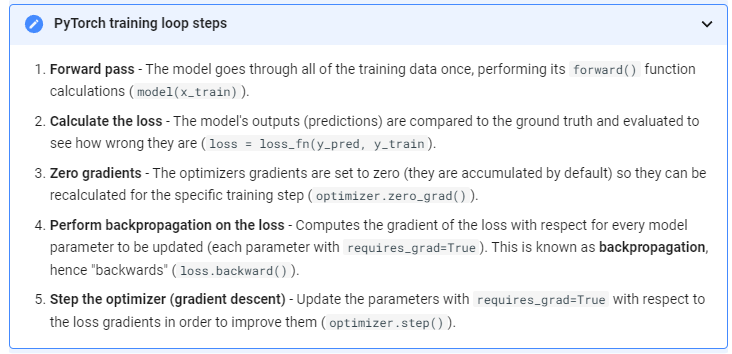

In [22]:
img.training_loop()

Going from logits to prediction probabilities to prediction labels 

raw output of the model are called logits. 

we can convert teh logits into prediction probabilities by passing them to some kind of activation function(e.g. sigmoid for binary crossentropy and softmax for multicass classification)

Then convert the model prediction probabilities to prediction labels by either rounding them or raking the `argmax()`

In [23]:
# viewing the first 5 outputs fo the forward pass on the test data
# REMEMBER THAT WHEN WE MAKE PREDICTIONS TURN IT INTO EVAL MODE
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1147],
        [ 0.1710],
        [-0.1540],
        [ 0.1914],
        [-0.3465]], device='cuda:0')

In [24]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5287],
        [0.5426],
        [0.4616],
        [0.5477],
        [0.4142]], device='cuda:0')

For prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, y=1 (class 1)
* `y_pred_probs` < 0.5, y=0 (class 0)

In [25]:
# finding the predicted labels
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
# .round always goes up

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 0.], device='cuda:0')

# Building the training loop

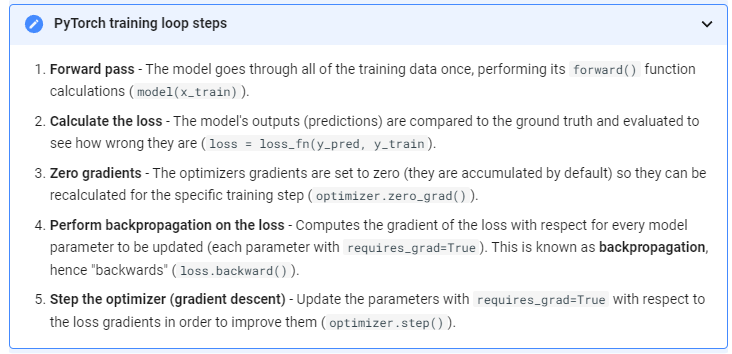

In [26]:
img.training_loop()

In [27]:
# random seed 
torch.manual_seed(42)

epochs = 1000

# on device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# training loop 
for epoch in range(epochs):
    # turn model in training 
    model_0.train()

    # forward pass 
    y_logits = model_0(X_train).squeeze() # squeeze to get rid of extra dimensions
    y_pred = torch.round(torch.sigmoid(y_logits)) # turning logits -> pred probs -> pred labels

    # calculate loss and accuracy
    loss = loss_fn(y_logits, # since our loss function is BCE with logits it expects logits as an input
                   y_train)
    
    # if you were to use BCELoss() instead
    # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as an input
    #               y_train)
    
    # calculate accuracy
    # put in the data opposite the loss function 
    acc = accuracy_fn(y_true=y_train, # labels
                      y_pred=y_pred) # data

    # zero gradients (turn off gradients tracking)
    optimizer.zero_grad()

    # backpropagation 
    loss.backward()

    # optimizer
    optimizer.step()

    # testing
    model_0.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # calculating test loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")

epoch: 0 | Loss: 0.69779 | Acc: 48.88% | Test loss: 0.70366, Test Acc: 48.00% 
epoch: 10 | Loss: 0.69615 | Acc: 49.75% | Test loss: 0.70201, Test Acc: 47.50% 
epoch: 20 | Loss: 0.69535 | Acc: 50.38% | Test loss: 0.70099, Test Acc: 46.50% 
epoch: 30 | Loss: 0.69486 | Acc: 50.50% | Test loss: 0.70021, Test Acc: 47.00% 
epoch: 40 | Loss: 0.69452 | Acc: 50.25% | Test loss: 0.69957, Test Acc: 47.50% 
epoch: 50 | Loss: 0.69425 | Acc: 50.38% | Test loss: 0.69901, Test Acc: 47.00% 
epoch: 60 | Loss: 0.69404 | Acc: 50.38% | Test loss: 0.69853, Test Acc: 47.00% 
epoch: 70 | Loss: 0.69386 | Acc: 50.75% | Test loss: 0.69810, Test Acc: 47.00% 
epoch: 80 | Loss: 0.69372 | Acc: 50.62% | Test loss: 0.69773, Test Acc: 47.00% 
epoch: 90 | Loss: 0.69360 | Acc: 50.62% | Test loss: 0.69740, Test Acc: 47.00% 
epoch: 100 | Loss: 0.69350 | Acc: 50.88% | Test loss: 0.69712, Test Acc: 46.50% 
epoch: 110 | Loss: 0.69342 | Acc: 51.12% | Test loss: 0.69686, Test Acc: 46.50% 
epoch: 120 | Loss: 0.69335 | Acc: 51.38

# Making predictions and evaluate the model

From the data above we can see that the model is not learning, and doing no better than guessing 50/50

using a function called `plot_decision_boundary` we will see a more visual representation

In [28]:
import requests
from pathlib import Path

# Downloading helper functions from Learn pytorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists")
else:
    print("Downloading the helper_functions.py")
    # this can be used for all websites that have raw code (mainly used for github)
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    # below helper_functions makes the file and names it, and wb give us permission to write to the file. 
    with open("helper_functions.py", "wb") as f: # wb = writing binary, f is a common way to write to file
        f.write(requests.content) # calls all above

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


# Plotting

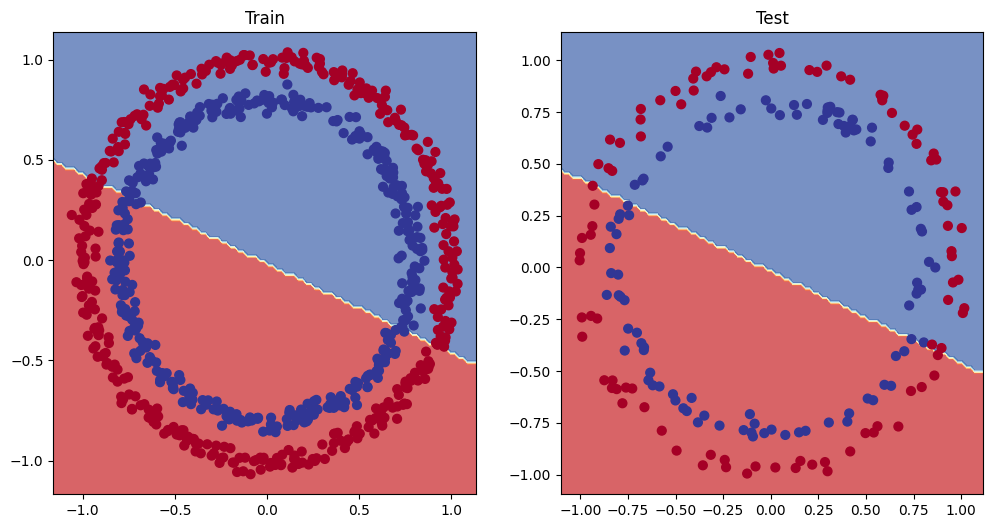

In [29]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test, y_test)

# Imporving the model
some ways to improve the model is:
* Add more layers - this give the machine more chances to find patterns in the data (in_features)
* Add more hidden units - increase the amount of hidden units we have (out_features)

More is not always better if there is to many things to calculate than no patterns will be found
* Fit the model for longer (more epochs)
* Change the activations function. (we used sigmoid since this is a binary classification function. but there are more that can be used.) 

You can also put more than one activation function within your model (see below on how this can be used.)
* Changing the learning rate (this will adjust how much the model will adjust from epoch to epoch)
* Changing the loss function 

**Note when changing something only change one thing at a time**

In [30]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        
        self.layer_2 = nn.Linear(in_features=10, out_features=10)

        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        # output to one layer because our y_train only contains one layer
        # y_train only has one layer because this is a binary classification. 

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
with torch.inference_mode():
    y_logits = model_1(X_train.to(device))
y_logits[:5]

tensor([[-0.0462],
        [-0.0431],
        [ 0.1209],
        [ 0.1168],
        [ 0.0347]], device='cuda:0')

# Improved loss function/Optimizer


In [32]:
improved_loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

# Training the improved model 

In [33]:
# random seed
torch.manual_seed(42)

# Training loop
epochs = 1000

# putting data on device
X_train,X_test = X_train.to(device), X_test.to(device)
y_train,y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    # Model ready to train
    model_1.train()

    # Forward pass
    y_logits = model_1(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # Loss function
    loss = improved_loss_fn(y_logits, # data we are using
                            y_train) # The data's labels
    
    # calculating accuracy
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_preds)
    
    # zero the gradients
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # optimize
    optimizer.step()

    # testing
    # note that testing the data is the exact same as training the data except
    # tha we are using X_test and y_test instead. 
    model_1.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        # Accuracy/loss
        test_loss = improved_loss_fn(test_logits,
                                     y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_preds)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.5f}, Accuracy: {round(acc)}% | Testing loss: {test_loss:.5f}, Testing Accuracy: {round(test_acc)}% ")

Epoch: 0, Loss: 0.69396, Accuracy: 51% | Testing loss: 0.69261, Testing Accuracy: 51% 
Epoch: 100, Loss: 0.69305, Accuracy: 50% | Testing loss: 0.69379, Testing Accuracy: 48% 
Epoch: 200, Loss: 0.69299, Accuracy: 51% | Testing loss: 0.69437, Testing Accuracy: 46% 
Epoch: 300, Loss: 0.69298, Accuracy: 52% | Testing loss: 0.69458, Testing Accuracy: 45% 
Epoch: 400, Loss: 0.69298, Accuracy: 51% | Testing loss: 0.69465, Testing Accuracy: 46% 
Epoch: 500, Loss: 0.69298, Accuracy: 51% | Testing loss: 0.69467, Testing Accuracy: 46% 
Epoch: 600, Loss: 0.69298, Accuracy: 51% | Testing loss: 0.69468, Testing Accuracy: 46% 
Epoch: 700, Loss: 0.69298, Accuracy: 51% | Testing loss: 0.69468, Testing Accuracy: 46% 
Epoch: 800, Loss: 0.69298, Accuracy: 51% | Testing loss: 0.69468, Testing Accuracy: 46% 
Epoch: 900, Loss: 0.69298, Accuracy: 51% | Testing loss: 0.69468, Testing Accuracy: 46% 


# Improved plot

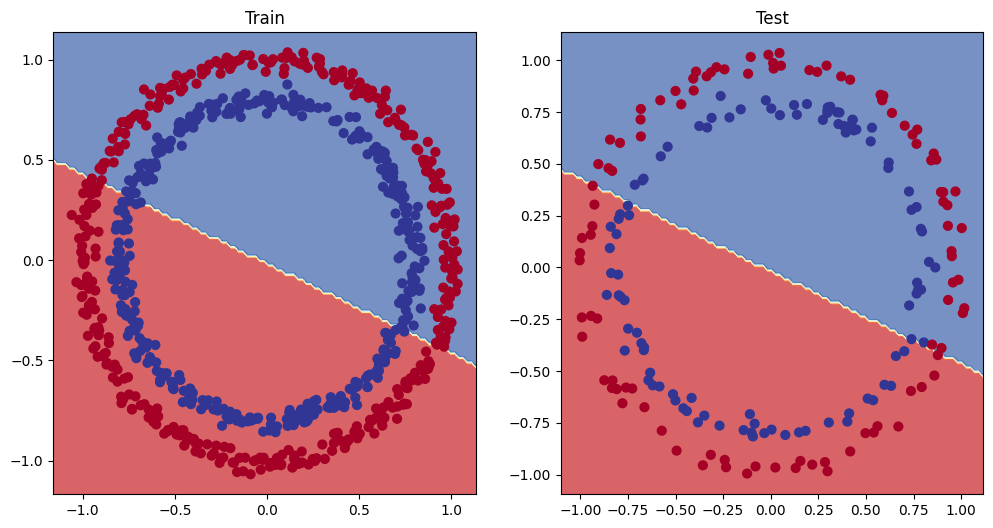

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test, y_test)

# Troubleshooting
when trying to fix a lager problem is to test out a smaller problem. 
* Have the same problem just having less data

checking to see if our model works

In [35]:
weight = .7
bias = .3

X_regression = torch.arange(0,1,.01).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# check the data
print(len(X_regression))
X_regression[:5],y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [36]:
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# check the length
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)


(80, 20, 80, 20)

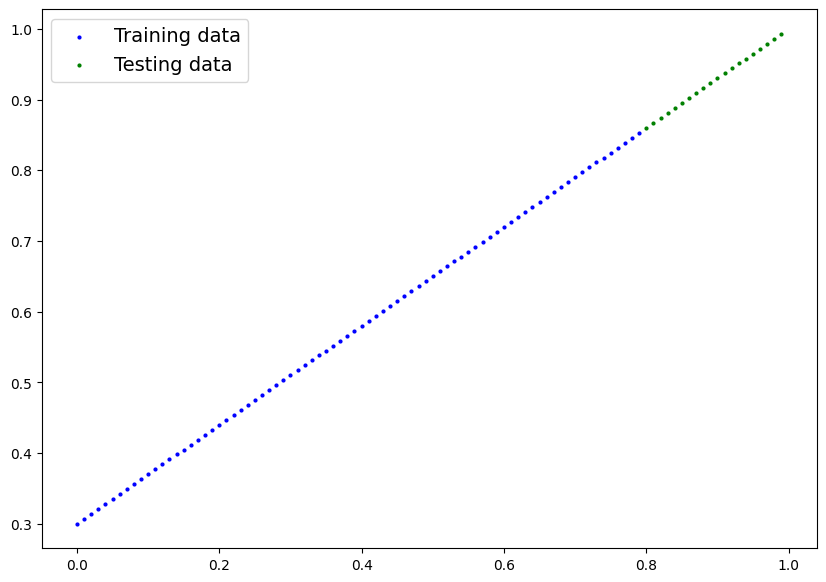

In [37]:
# using the help functions
plot_predictions(train_data=X_train_regression,
                  train_labels=y_train_regression,
                  test_data=X_test_regression,
                  test_labels=y_test_regression)

In [38]:
# model
model_2 = nn.Sequential(nn.Linear(in_features=1, out_features=10),
                        nn.Linear(in_features=10, out_features=10),
                        nn.Linear(in_features=10, out_features=1)).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
loss_fnn = nn.L1Loss()

optimizerr = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [40]:
# random seed
torch.manual_seed(42)

epochs = 1000

# putting data on device 
X_train_regression, X_test_regression = X_train_regression.to(device), X_test_regression.to(device)
y_train_regression, y_test_regression = y_train_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    #model_2.train()

    y_pred = model_2(X_train_regression)

    loss = loss_fnn(y_pred,
                   y_train_regression)
    
    optimizerr.zero_grad()

    loss.backward()

    optimizerr.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fnn(test_pred,
                            y_test_regression)
        
        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, Loss: {loss:.5f} | Testing Loss: {test_loss:.5f}")


Epoch: 0, Loss: 0.75986 | Testing Loss: 0.91103
Epoch: 100, Loss: 0.02858 | Testing Loss: 0.00081
Epoch: 200, Loss: 0.02533 | Testing Loss: 0.00209
Epoch: 300, Loss: 0.02137 | Testing Loss: 0.00305
Epoch: 400, Loss: 0.01964 | Testing Loss: 0.00341
Epoch: 500, Loss: 0.01940 | Testing Loss: 0.00387
Epoch: 600, Loss: 0.01903 | Testing Loss: 0.00379
Epoch: 700, Loss: 0.01878 | Testing Loss: 0.00381
Epoch: 800, Loss: 0.01840 | Testing Loss: 0.00329
Epoch: 900, Loss: 0.01798 | Testing Loss: 0.00360


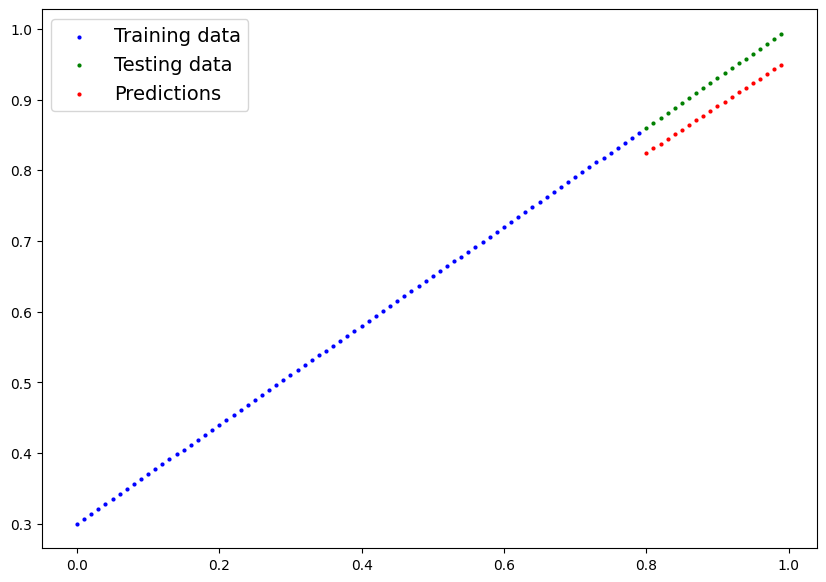

In [41]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels= y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

# Linear and nonlinear
In machine learning an infinite( but really it is finite) of linear and non linear functions

Recreating non linear data

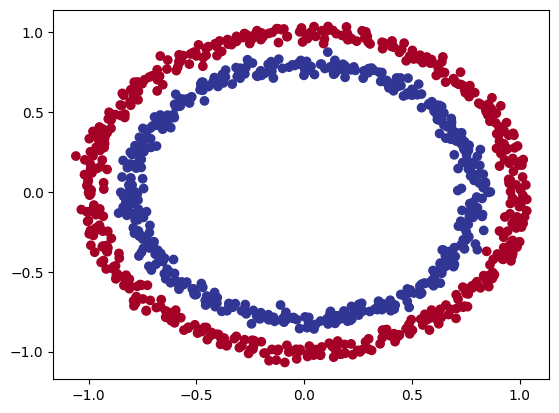

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [43]:
# converting data to tensors
import torch
from sklearn.model_selection import train_test_split

# turing to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# splilting into train and test
X_train_t,X_test_t, y_train_t, y_test_t = train_test_split(X,
                                                           y,
                                                           test_size=.2,
                                                            random_state=42)


# Building a model with non linear function.
